In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt

# insert the mymujoco path for TrainDQN.py file
sys.path.insert(0, "/home/luke/mymujoco/rl")

# create modelsaver instance
from ModelSaver import ModelSaver
saver = ModelSaver("test_data", root="/home/luke/gripper-ros/")

In [3]:
# enter fold and load test data
test_name = "delete"
saver.enter_folder(test_name)
testdata = saver.load(id=None, filenamestarts="test_data", suffix_numbering=True)

Loading file /home/luke/gripper-ros/test_data/delete/test_data_001.pbz2 with pickle ... finished


In [4]:
print("num trials is", len(testdata.trials))
print("group name is", testdata.group_name)
print("run name is", testdata.run_name)
print("best simulated sr is", testdata.best_SR)
print(testdata)

num trials is 1
group name is 13-02-23
run name is luke-PC_17_37_A95
best simulated sr is 0.8166666666666667
TestData(trials=[TrialData(object_name='', object_num=0, trial_num=0, steps=[step_data(step_num=1, state_vector=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], SI_state=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], action=2), step_data(step_num=2, state_vector=[0.0, 0.0, 0.0, 0.0, 0.0, -4.9988429964287207e-05, -0.0001499652862548828, 0.0, 0.0, 0.0, 0.0, 0.0, -2.104043960571289e-05, -6.312131881713867e-05, 0.0, 0.0, 0.0, 0.0, 0.0, -7.271766662597656e-06, -2.181529998779297e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 4.355112832854502e-05, 0.00013065338134765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009000022895634174, 0.027000069618225098

In [6]:
# load image data
test_name = "delete"
saver.enter_folder(test_name)
imagedata = saver.load(id=None, filenamestarts="trial_image_batch")

Loading file /home/luke/gripper-ros/test_data/delete/trial_image_batch_001.pbz2 with pickle ... finished


There are 36 images


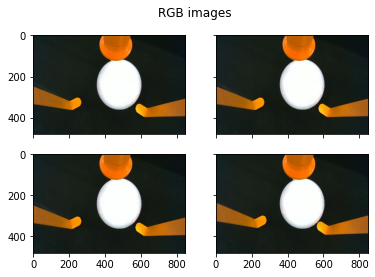

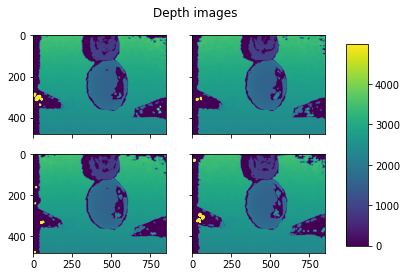

In [7]:
image_list = imagedata.trials[0].images

print("There are", len(image_list), "images")

# print(image_list[0].depth)

rows = 2
cols = 2

num_images = rows * cols
if num_images > len(image_list): num_images = len(image_list)

fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True)
fig2, axs2 = plt.subplots(rows, cols, sharex=True, sharey=True)

# saturate any values above this (ignore outliers)
depth_max = 5000

# find minimum of minima & maximum of depth data
dmin = 1e10
dmax = -1e10
for i in range(len(image_list)):
  this_min = np.min(image_list[i].depth[image_list[i].depth < depth_max])
  this_max = np.max(image_list[i].depth[image_list[i].depth < depth_max])
  if this_min < dmin: dmin = this_min
  if this_max > dmax: dmax = this_max

for j in range(num_images):
  ix = j // cols
  iy = j % cols
  axs[ix][iy].imshow(image_list[j].rgb, aspect="auto")
  im2 = axs2[ix][iy].imshow(image_list[j].depth, vmin=dmin, vmax=dmax, aspect='auto', cmap="viridis")

fig2.subplots_adjust(right=0.8)
cbar_ax = fig2.add_axes([0.85, 0.15, 0.05, 0.7])
fig2.colorbar(im2, cax=cbar_ax)

fig.suptitle("RGB images")
fig2.suptitle("Depth images")

fig.set_size_inches((cols * 3, rows * 2))
fig2.set_size_inches((cols * 3, rows * 2))

plt.show()
